Quiz Title: Bitcoin Price Forecasting with ARIMA

Quiz Description:

First collect bitcoin price from 2022-01-01T00:00:00Z till 2022-12-01T23:59:59Z within 1 hour interval you can use wallex or nobitex or coinbase.com or ...

Then Your task is to use the ARIMA (AutoRegressive Integrated Moving Average) model to forecast the price of Bitcoin for a future period accoarding to data that you collected.

Question 1: Perform a visual analysis of the dataset. Plot the time series of Bitcoin prices over the 12 months.

Question 2: Before applying ARIMA, what steps would you take to make the time series stationary? Do them all

Question 3: Apply the ARIMA model to the dataset. Choose appropriate values for p, d, and q.

Question 4: Forecast the Bitcoin price for the next 3 hours using your ARIMA model.

Question 5: Evaluate the performance of your ARIMA model. Calculate and explain appropriate evaluation metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for your forecast.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Collect bitcoin price

In [3]:
import requests
import datetime

In [4]:
start_timestamp = int(datetime.datetime(2022, 1, 1).timestamp())
end_timestamp = int(datetime.datetime(2022, 12, 2).timestamp())
interval = 60
symbol = "BTCUSDT"
wallex = f'https://api.wallex.ir/v1/udf/history?symbol={symbol}&resolution={interval}&from={start_timestamp}&to={end_timestamp}'

response = requests.get(wallex)
response

<Response [200]>

In [5]:
df = pd.DataFrame(response.json())
df = df.loc[:, ["t", "o"]]
df.o = df.o.apply(lambda x: float(x))
df.t = df.t.apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp))
df

,t,o
0,2022-01-01 00:30:00,46850.00
1,2022-01-01 01:30:00,47265.70
2,2022-01-01 02:30:00,46100.00
3,2022-01-01 03:30:00,45900.00
4,2022-01-01 04:30:00,46124.85
...,...,...
7890,2022-12-01 19:30:00,17000.00
7891,2022-12-01 20:30:00,17003.37
7892,2022-12-01 21:30:00,17003.37
7893,2022-12-01 22:30:00,17000.36


In [6]:
df.index = pd.to_datetime(df.t)
df = df.drop(columns="t")
df

,o
t,
2022-01-01 00:30:00,46850.00
2022-01-01 01:30:00,47265.70
2022-01-01 02:30:00,46100.00
2022-01-01 03:30:00,45900.00
2022-01-01 04:30:00,46124.85
...,...
2022-12-01 19:30:00,17000.00
2022-12-01 20:30:00,17003.37
2022-12-01 21:30:00,17003.37


In [7]:
df.describe()

,o
count,7895.000000
mean,29118.113569
std,9971.403101
min,15599.570000
25%,20100.000000
50%,24020.650000
75%,39301.510000
max,47925.130000


## Question 1

In [8]:
plt.rcParams['figure.figsize'] =  12, 6

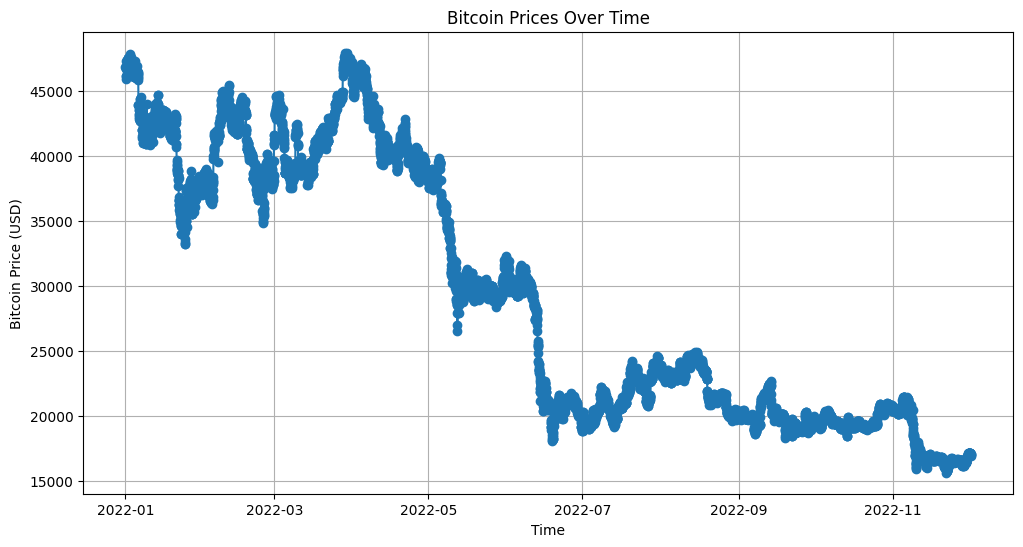

In [9]:
plt.plot(df, "o", linestyle="-")
plt.title("Bitcoin Prices Over Time")
plt.xlabel("Time")
plt.ylabel("Bitcoin Price (USD)")
plt.grid()
plt.show()

## Question 2

In [10]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
adf_test = adfuller(df)
print(f"p-value: {adf_test[1]}")

p-value: 0.6017127930997763


p-value > 5% -> df is not stationary

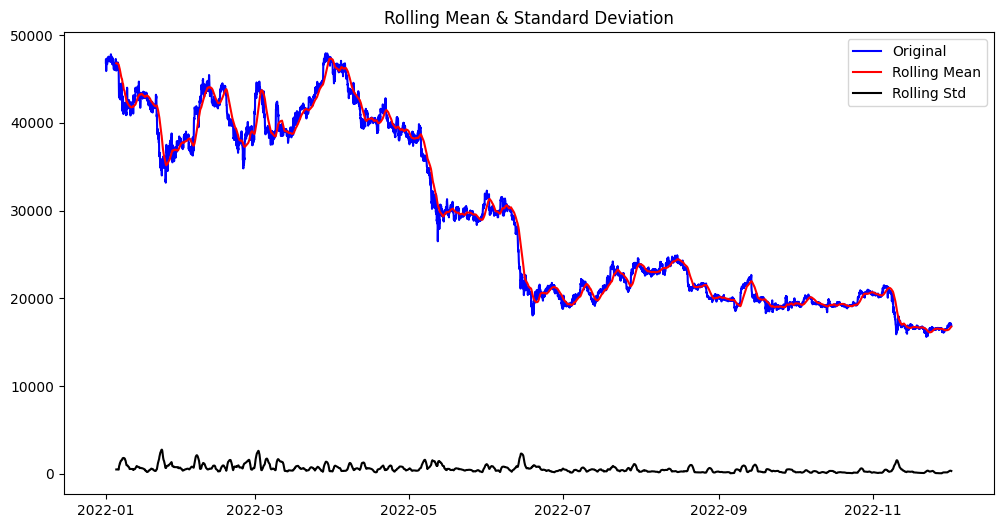

In [12]:
roll_mean = df.rolling(window=60).mean()
roll_std = df.rolling(window=60).std()

orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
std = plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

roll_std is almost constant but roll_mean is not,<br/>
so to make df stationary we need to make roll_mean constant

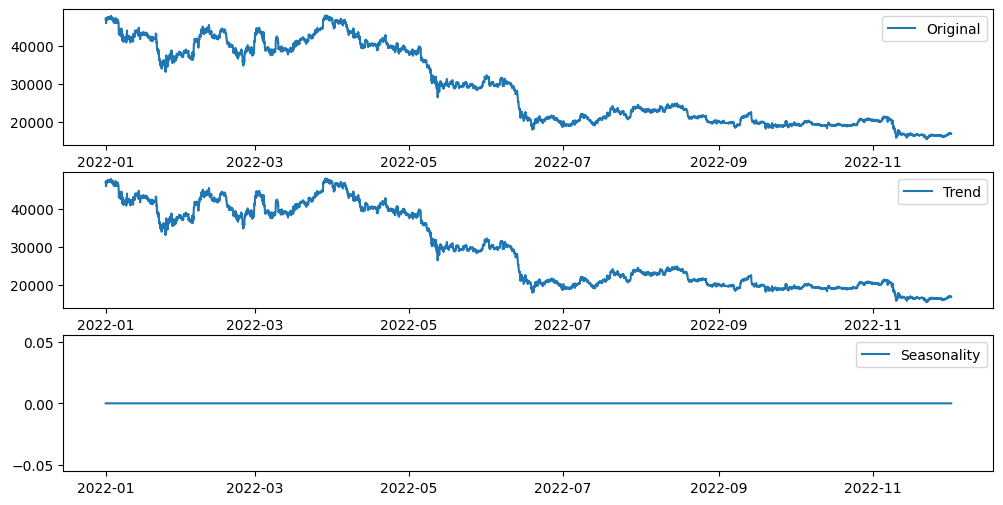

In [13]:
decomposition = seasonal_decompose(df, period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal

fig = plt.figure(1)

plt.subplot(311)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(312)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(313)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

<Axes: xlabel='t'>

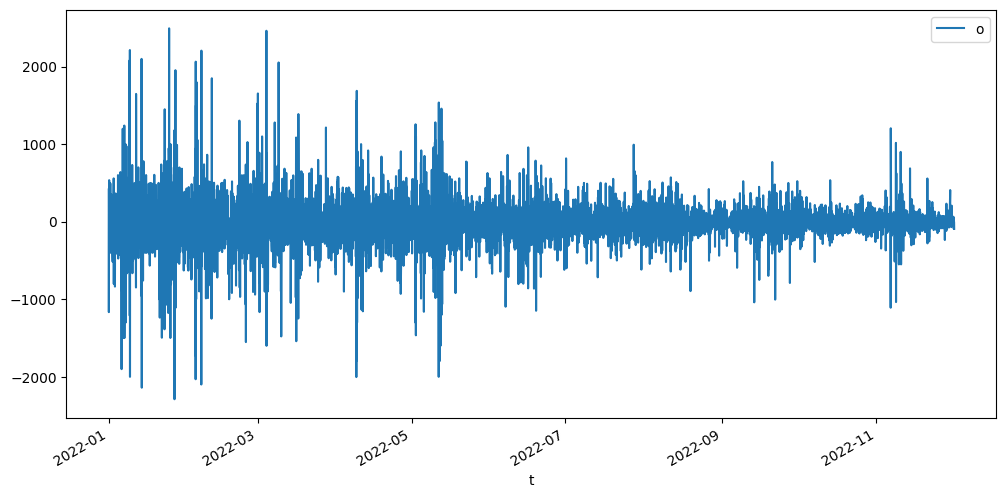

In [14]:
df_diff = df.diff().dropna()
df_diff.plot()

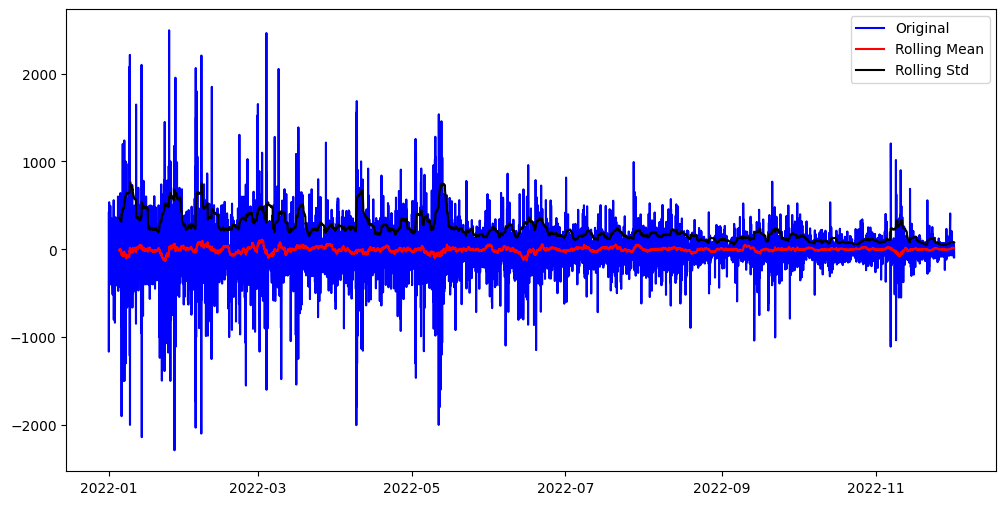

In [15]:
roll_mean = df_diff.rolling(window=60).mean()
roll_std = df_diff.rolling(window=60).std()

orig = plt.plot(df_diff, color='blue',label='Original')
mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
std = plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.show()

constant roll_mean & roll_std

In [16]:
adf_test = adfuller(df_diff)
print(f"p-value: {adf_test[1]}")

p-value: 0.0


p-value < 5% -> df is stationary

## Question 3

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

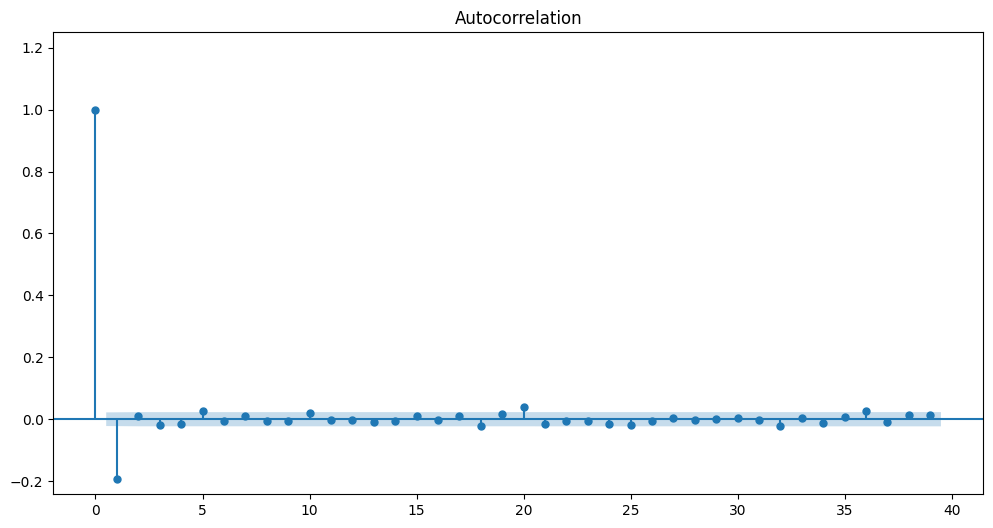

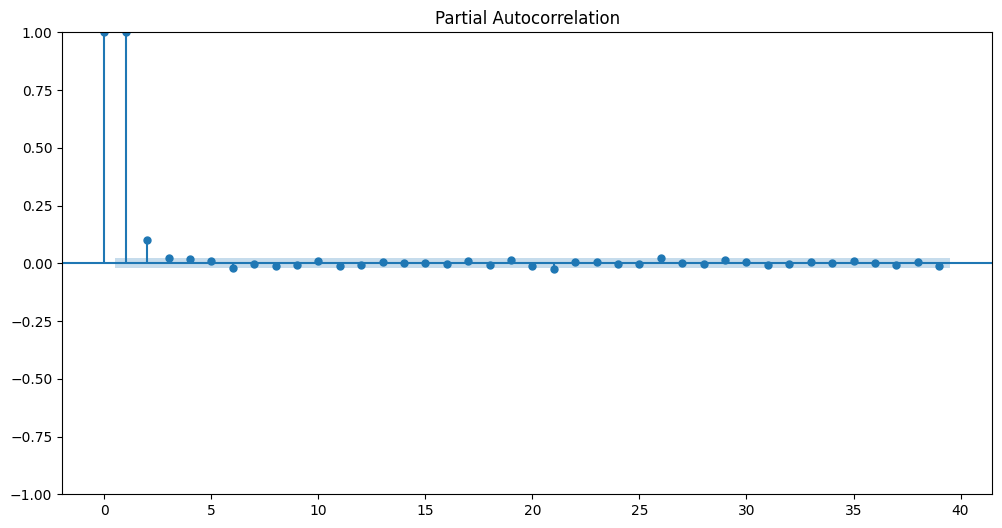

In [18]:
plot_acf(df_diff, auto_ylims=True)
plot_pacf(df)
plt.show()

In [19]:
p = 2
d = 1
q = 3

In [20]:
arima_model = ARIMA(df, order=(p, d, q))
model = arima_model.fit()
print(model.summary())

/home/fatemeh/Documents/ML-Basic1/ML-Basic-venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fatemeh/Documents/ML-Basic1/ML-Basic-venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fatemeh/Documents/ML-Basic1/ML-Basic-venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      o   No. Observations:                 7895
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -55302.585
Date:                Mon, 09 Oct 2023   AIC                         110617.170
Time:                        23:41:10   BIC                         110659.013
Sample:                             0   HQIC                        110631.502
                               - 7895                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5060      0.030     16.876      0.000       0.447       0.565
ar.L2         -0.9261      0.029    -32.201      0.000      -0.983      -0.870
ma.L1         -0.7014      0.031    -22.992      0.0

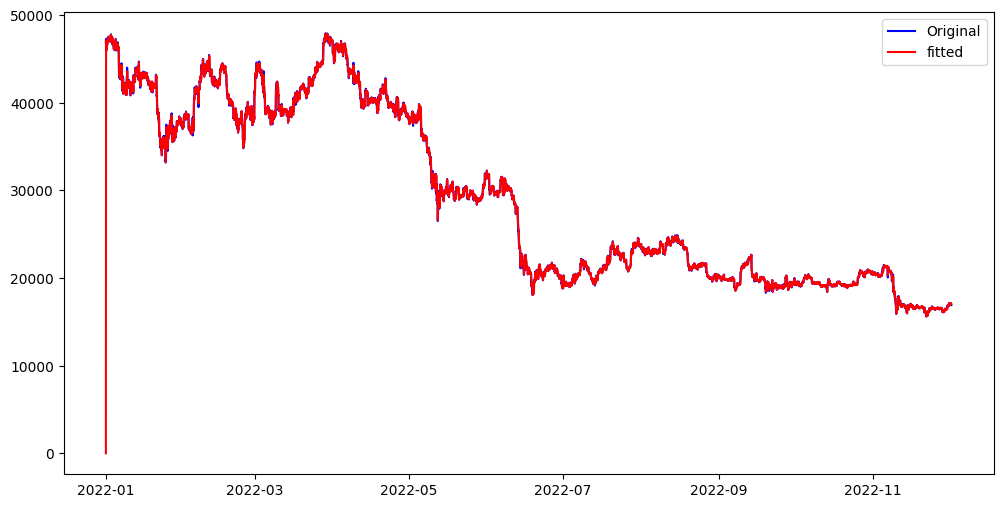

In [23]:
orig = plt.plot(df, color='blue',label='Original')
fitted = plt.plot(model.fittedvalues, color='red', label='fitted')
plt.legend(loc='best')
plt.show()

## Question 4

In [24]:
predictions = model.forecast(3)
predictions

/home/fatemeh/Documents/ML-Basic1/ML-Basic-venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


7895    16926.959768
7896    16927.148809
7897    16928.274839
Name: predicted_mean, dtype: float64

## Question 5

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
size = int(len(df) * 0.8)
train, test = df[:size], df[size: len(df)]

In [31]:
arima_model = ARIMA(train, order=(p, d, q))
model = arima_model.fit()

/home/fatemeh/Documents/ML-Basic1/ML-Basic-venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fatemeh/Documents/ML-Basic1/ML-Basic-venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fatemeh/Documents/ML-Basic1/ML-Basic-venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [32]:
predictions = model.forecast(len(test))

/home/fatemeh/Documents/ML-Basic1/ML-Basic-venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [33]:
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

In [34]:
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1592.6556783491567
MAE: 1366.2011676483307
